In [1]:
# Author: rentaowan.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

raw_data_file = "../data/ETHUSDT.csv"
column_names= ["Timestamp", "Price", "Volume"]

In [3]:
df = pd.read_csv(raw_data_file, header=None, names=column_names)

In [4]:
# Changing the unix epoch time to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")
df.set_index("Timestamp", inplace=True)
df.shape

(207727, 2)

In [5]:
# Remove duplicate timestamp (in seconds)
df = df.resample("1T").agg({"Price": "mean", "Volume": "sum"})
# Forward fill the price data
df["Price"] = df["Price"].ffill()
# Calculate price difference
df["diff"] = df["Price"].diff()

In [6]:
# 5 moving averages - 2, 4, 5, 8 & 12 hours
df["2H_ma"] = df["Price"].rolling(120).mean()
df["4H_ma"] = df["Price"].rolling(240).mean()
df["5H_ma"] = df["Price"].rolling(300).mean()
df["8H_ma"] = df["Price"].rolling(480).mean()
df["12H_ma"] = df["Price"].rolling(720).mean()

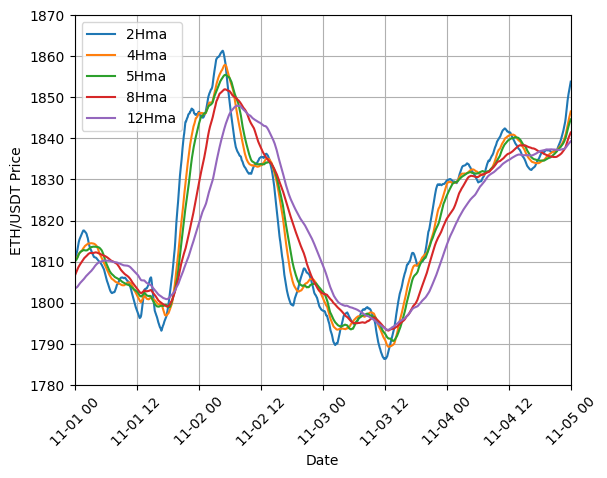

In [7]:
plt.plot(df["2H_ma"].dropna(), label="2Hma")
plt.plot(df["4H_ma"].dropna(), label="4Hma")
plt.plot(df["5H_ma"].dropna(), label="5Hma")
plt.plot(df["8H_ma"].dropna(), label="8Hma")
plt.plot(df["12H_ma"].dropna(), label="12Hma")
 

plt.xlim([datetime.datetime(2023, 11, 1, 0), datetime.datetime(2023, 11, 5, 0)])
plt.ylim(1780, 1870)

plt.xticks(rotation=45)

plt.legend()
plt.ylabel("ETH/USDT Price")
plt.xlabel("Date")

plt.grid()
plt.show()

In [8]:
# Calculate Distance
df["dist1"] = df["2H_ma"] / df["12H_ma"]
df["dist2"] = df["4H_ma"] / df["12H_ma"]
df["dist3"] = df["5H_ma"] / df["12H_ma"]
df["dist4"] = df["8H_ma"] / df["12H_ma"]

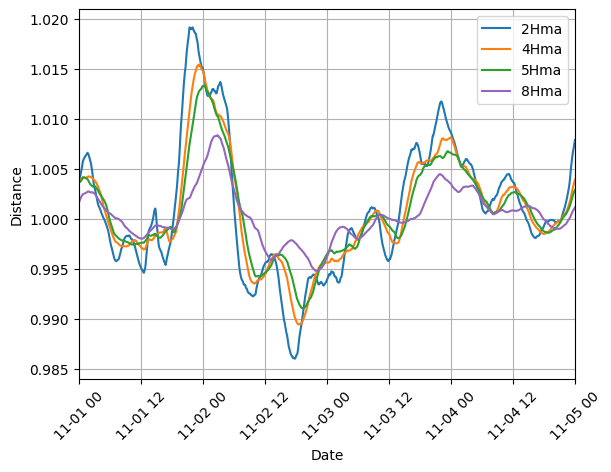